### Model for Cluster 1 bankruptcy risk prediction

#### Importing the libraries

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [114]:
dataset=pd.read_csv('output/predicted_cluster_1.csv')
dataset.head()

,Quick Assets/Total Assets,Equity to Liability,Cash/Total Assets,Total debt/Total net worth,Current Assets/Total Assets,Equity to Long-term Liability,Current Liabilities/Liability,Cash/Current Liability,Long-term Liability to Current Assets,Long-term fund suitability ratio (A),...,Cash Flow to Liability,PCA_ROA(C) before interest and depreciation before interest_ROA(A) before interest and % after tax,Total expense/Assets,Total income/Total expense,Cash Flow to Equity,Cash Flow to Total Assets,No-credit Interval,Interest Expense Ratio,Index,Bankrupt?
0,0.612447,0.463131,0.776656,1.073490e-08,0.614336,0.664512,0.818904,1.322132e-09,0.0,0.611950,...,0.589565,0.609003,0.546679,0.785189,0.530296,0.586636,0.582824,0.579210,3,0
1,0.804115,0.810645,0.844113,2.304266e-09,0.864584,0.664512,0.986759,4.550709e-09,0.0,0.978479,...,0.603930,0.650012,0.585078,0.798495,0.536581,0.634496,0.583327,0.577207,7,0
2,0.725072,0.653979,0.856163,5.114959e-09,0.784447,0.664512,0.965059,2.770846e-09,0.0,0.611130,...,0.660103,0.635383,0.408112,0.819587,0.558265,0.846972,0.583593,0.577273,21,0
3,0.604278,0.662040,0.785863,4.948011e-09,0.618598,0.664512,0.921107,2.104154e-09,0.0,0.442144,...,0.597252,0.678430,0.545835,0.808160,0.535609,0.623613,0.582956,0.577207,24,0
4,0.544182,0.706665,0.713803,4.076697e-09,0.675093,0.664512,0.927602,1.795206e-09,0.0,0.384757,...,0.594500,0.582683,0.476807,0.785832,0.534696,0.615262,0.583185,0.579410,34,0


In [115]:
dataset.dtypes

Quick Assets/Total Assets                                                                             float64
Equity to Liability                                                                                   float64
Cash/Total Assets                                                                                     float64
Total debt/Total net worth                                                                            float64
Current Assets/Total Assets                                                                           float64
Equity to Long-term Liability                                                                         float64
Current Liabilities/Liability                                                                         float64
Cash/Current Liability                                                                                float64
Long-term Liability to Current Assets                                                                 float64
Long-term 

In [116]:
dataset.describe()

,Quick Assets/Total Assets,Equity to Liability,Cash/Total Assets,Total debt/Total net worth,Current Assets/Total Assets,Equity to Long-term Liability,Current Liabilities/Liability,Cash/Current Liability,Long-term Liability to Current Assets,Long-term fund suitability ratio (A),...,Cash Flow to Liability,PCA_ROA(C) before interest and depreciation before interest_ROA(A) before interest and % after tax,Total expense/Assets,Total income/Total expense,Cash Flow to Equity,Cash Flow to Total Assets,No-credit Interval,Interest Expense Ratio,Index,Bankrupt?
count,741.000000,741.000000,741.000000,7.410000e+02,741.000000,741.000000,741.000000,7.410000e+02,741.000000,741.000000,...,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000
mean,0.649173,0.684022,0.750850,2.699061e-03,0.739811,0.665415,0.861186,4.125075e-09,0.027502,0.702739,...,0.605684,0.657032,0.534537,0.807186,0.538073,0.647965,0.583217,0.577347,2294.155196,0.036437
std,0.125684,0.159734,0.158204,5.191732e-02,0.120269,0.003170,0.151285,5.712143e-09,0.161955,0.214357,...,0.060429,0.099351,0.154869,0.029003,0.009456,0.083757,0.002933,0.000796,1347.149210,0.187502
min,0.286455,0.249898,0.037071,8.061912e-11,0.333716,0.664512,0.126217,3.233723e-11,0.000000,0.267148,...,0.000000,0.177310,0.008638,0.717630,0.459054,0.152581,0.541706,0.570051,3.000000,0.000000
25%,0.553408,0.567295,0.668075,2.281618e-09,0.649531,0.664512,0.793184,1.182056e-09,0.000000,0.511636,...,0.591623,0.607926,0.438817,0.790644,0.533684,0.606423,0.582759,0.577207,1103.000000,0.000000
50%,0.640390,0.703722,0.776656,4.134667e-09,0.746944,0.664512,0.911102,2.335368e-09,0.000000,0.711846,...,0.604399,0.653966,0.556371,0.803581,0.538235,0.647564,0.583023,0.577210,2272.000000,0.000000
75%,0.751456,0.813520,0.867139,7.207043e-09,0.826944,0.664512,0.978663,4.934062e-09,0.000000,0.910450,...,0.622285,0.711024,0.642037,0.820426,0.543338,0.693902,0.583444,0.577305,3481.000000,0.000000
max,1.000000,0.999003,1.000000,1.000000e+00,0.995453,0.694996,1.000000,8.448017e-08,1.000000,0.999998,...,0.973937,1.000000,0.892054,0.957556,0.574946,0.952548,0.618571,0.585062,4615.000000,1.000000


In [117]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
indexes=dataset['Index']
bankrupt_=dataset['Bankrupt?']
dataset=pd.DataFrame(sc.fit_transform(dataset.iloc[:,:-2]),columns=dataset.columns[:-2])
dataset['Index']=indexes
dataset['Bankrupt?']=bankrupt_

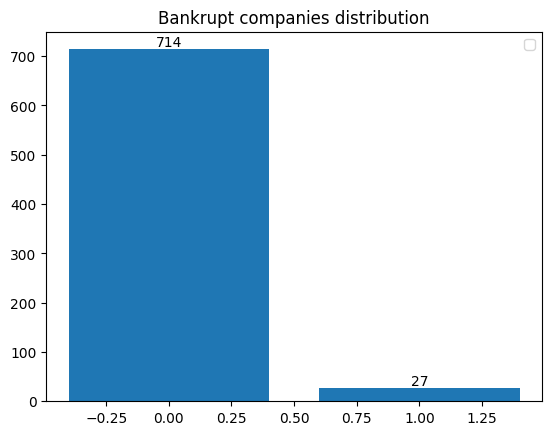

In [118]:
import matplotlib.pyplot as plt

categories=[0,1]
values=[len(dataset[dataset['Bankrupt?']==0]),len(dataset[dataset['Bankrupt?']==1])]
bars = plt.bar(x=categories, height=values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title("Bankrupt companies distribution")
plt.legend()
plt.show()

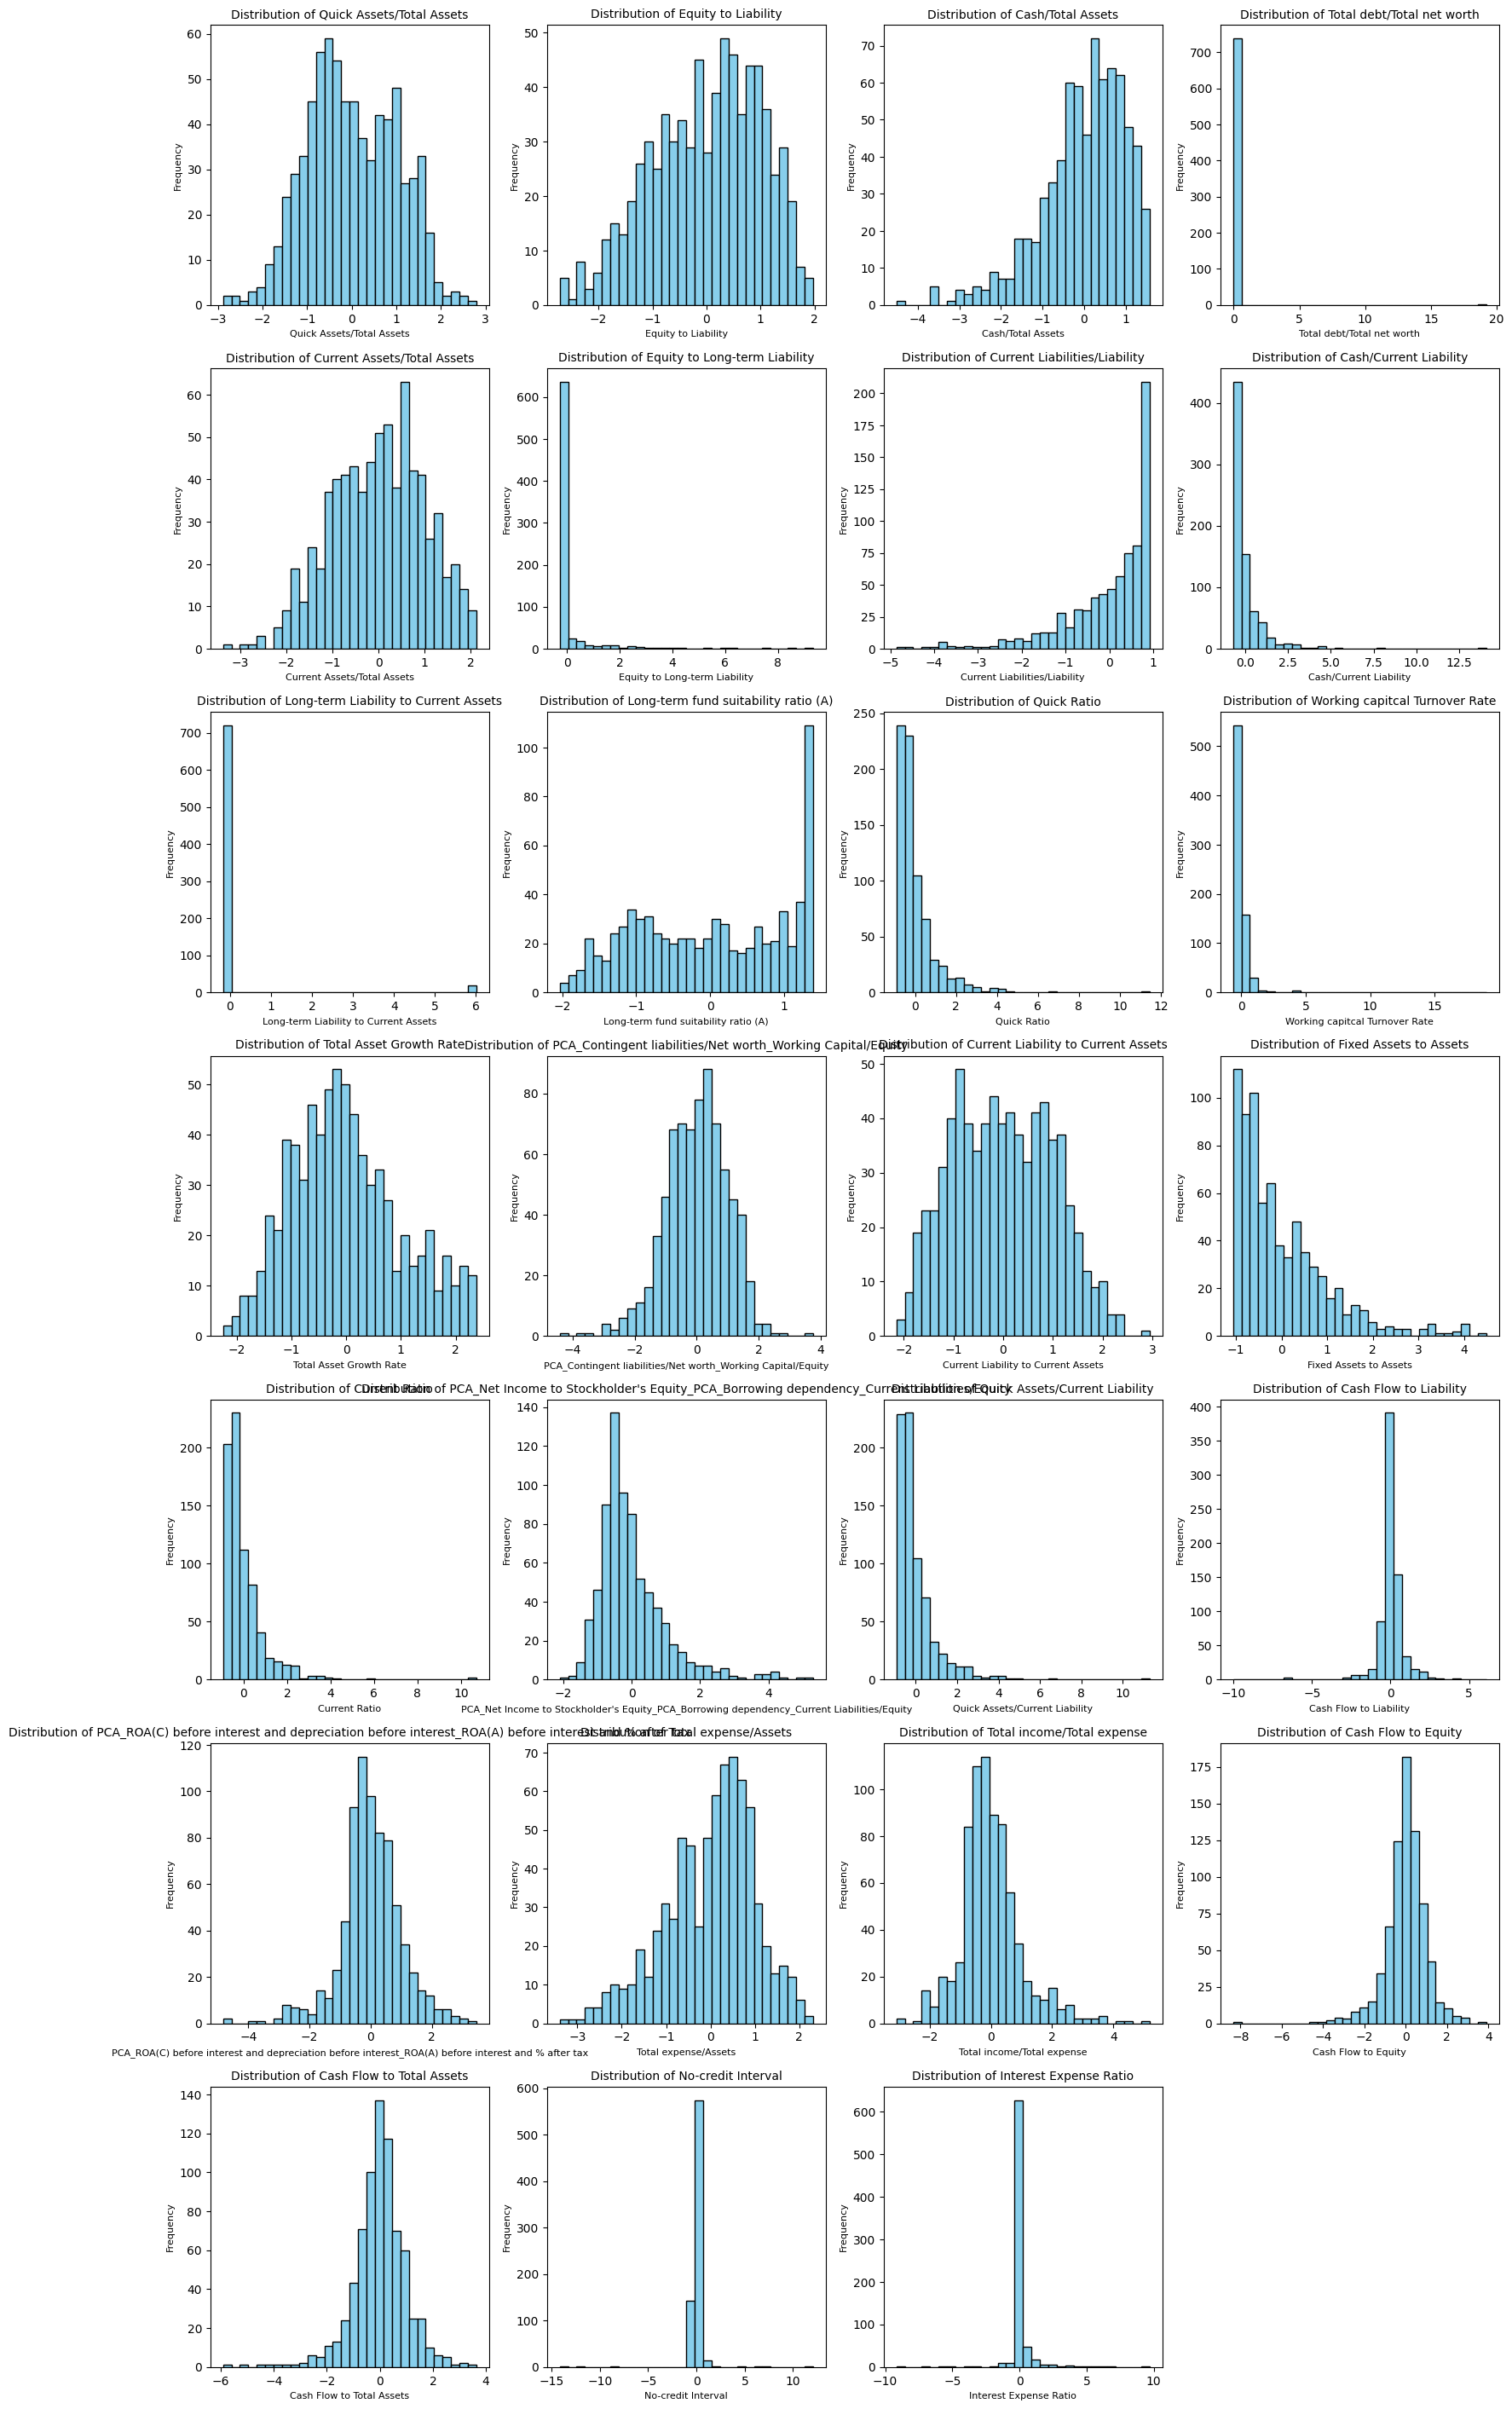

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_distributions_matplotlib(df, max_cols=4, figsize=(16, 4)):
    num_cols = len(df.columns)
    rows = (num_cols + max_cols - 1) // max_cols

    fig, axes = plt.subplots(rows, max_cols, figsize=(figsize[0], figsize[1] * rows))
    axes = axes.flatten()  # Flatten in case of multiple rows

    for i, col in enumerate(df.columns[:-2]):
        ax = axes[i]
        if pd.api.types.is_numeric_dtype(df[col]):
            ax.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
        else:
            df[col].value_counts().plot(kind='bar', ax=ax, color='coral', edgecolor='black')
        ax.set_title(f'Distribution of {col}', fontsize=10)
        ax.set_xlabel(col, fontsize=8)
        ax.set_ylabel('Frequency', fontsize=8)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Call the function
plot_distributions_matplotlib(dataset)


In [120]:
dataset.columns

Index(['Quick Assets/Total Assets', 'Equity to Liability', 'Cash/Total Assets',
       'Total debt/Total net worth', 'Current Assets/Total Assets',
       'Equity to Long-term Liability', 'Current Liabilities/Liability',
       'Cash/Current Liability', 'Long-term Liability to Current Assets',
       'Long-term fund suitability ratio (A)', 'Quick Ratio',
       'Working capitcal Turnover Rate', 'Total Asset Growth Rate',
       'PCA_Contingent liabilities/Net worth_Working Capital/Equity',
       'Current Liability to Current Assets', 'Fixed Assets to Assets',
       'Current Ratio',
       'PCA_Net Income to Stockholder's Equity_PCA_Borrowing dependency_Current Liabilities/Equity',
       'Quick Assets/Current Liability', 'Cash Flow to Liability',
       'PCA_ROA(C) before interest and depreciation before interest_ROA(A) before interest and % after tax',
       'Total expense/Assets', 'Total income/Total expense',
       'Cash Flow to Equity', 'Cash Flow to Total Assets',
       'No-c

In [121]:
columns_to_drop=[
    'Total debt/Total net worth',
    'Equity to Long-term Liability',
    'Long-term Liability to Current Assets',
    'Interest Expense Ratio'
]
dataset=dataset.drop(columns=columns_to_drop)

In [122]:
dataset.head()

,Quick Assets/Total Assets,Equity to Liability,Cash/Total Assets,Current Assets/Total Assets,Current Liabilities/Liability,Cash/Current Liability,Long-term fund suitability ratio (A),Quick Ratio,Working capitcal Turnover Rate,Total Asset Growth Rate,...,Quick Assets/Current Liability,Cash Flow to Liability,PCA_ROA(C) before interest and depreciation before interest_ROA(A) before interest and % after tax,Total expense/Assets,Total income/Total expense,Cash Flow to Equity,Cash Flow to Total Assets,No-credit Interval,Index,Bankrupt?
0,-0.292406,-1.383805,0.163229,-1.043986,-0.279678,-0.491031,-0.423826,-0.692274,-0.460537,-1.113085,...,-0.696520,-0.266932,-0.483755,0.078460,-0.758927,-0.822955,-0.732722,-0.134017,3,0
1,1.233628,0.793251,0.589912,1.038150,0.830602,0.074564,1.287227,0.386769,0.166320,0.593858,...,0.354992,-0.029052,-0.070706,0.326573,-0.299852,-0.157832,-0.160916,0.037764,7,0
2,0.604301,-0.188205,0.666127,0.371381,0.687069,-0.237239,-0.427655,-0.359286,-0.204075,-0.508419,...,-0.367021,0.901150,-0.218048,-0.816888,0.427875,2.136910,2.377616,0.128497,21,0
3,-0.357441,-0.137708,0.221465,-1.008525,0.396347,-0.354033,-1.216527,-0.451091,-0.220316,-0.329440,...,-0.467613,-0.139628,0.215528,0.073005,0.033591,-0.260663,-0.290938,-0.088914,24,0
4,-0.835920,0.141851,-0.234329,-0.538470,0.439306,-0.408156,-1.484425,-0.480973,-0.075477,-0.501969,...,-0.449401,-0.185204,-0.748852,-0.373017,-0.736744,-0.357284,-0.390718,-0.010809,34,0


Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
✅ Best Params: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 12, 'min_child_weight': 1, 'n_estimators': 150, 'scale_pos_weight': 26, 'subsample': 0.8}


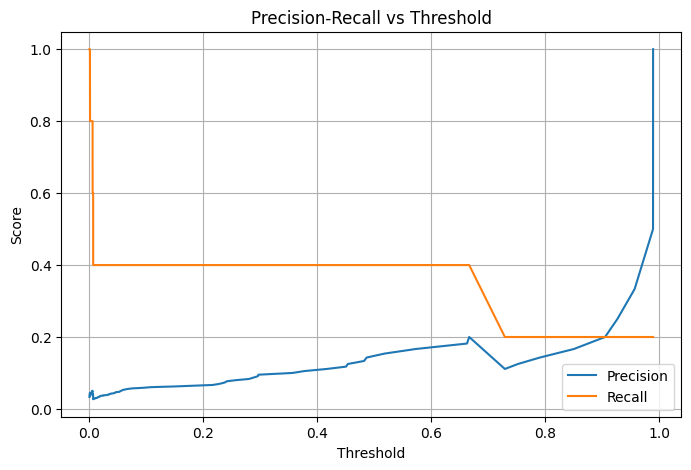

📊 Final Evaluation (Threshold = 0.96)
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       144
           1       0.50      0.20      0.29         5

    accuracy                           0.97       149
   macro avg       0.74      0.60      0.63       149
weighted avg       0.96      0.97      0.96       149

ROC AUC: 0.6375
PR AUC (Average Precision): 0.26713559128749004


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    average_precision_score,
    precision_recall_curve,
)
from imblearn.over_sampling import ADASYN
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

# --- 1. Load Dataset ---
# Assume 'dataset' is already loaded
X = dataset.drop(["Bankrupt?", "Index"], axis=1)
y = dataset["Bankrupt?"]

# --- 2. Train-Test Split (Stratified) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- 3. Standardization ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 4. ADASYN Oversampling ---
adasyn = ADASYN(random_state=42)
X_train_res, y_train_res = adasyn.fit_resample(X_train_scaled, y_train)

# --- 5. Model and Expanded Hyperparameter Grid ---
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [6, 9, 12, 15],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'scale_pos_weight': [10, 20, 26, 30],  # Class imbalance tuning
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.3]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='average_precision',
    cv=cv,
    verbose=2,
    n_jobs=-1,
    refit=True,
    return_train_score=True
)

# --- 6. Fit Grid Search on Resampled Data ---
grid.fit(X_train_res, y_train_res)

print("✅ Best Params:", grid.best_params_)

best_model = grid.best_estimator_

# --- 7. Predict Probabilities on Test Set ---
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# --- 8. Threshold Tuning ---
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()



In [149]:
# --- 9. Choose Optimal Threshold and Evaluate ---
optimal_threshold = 0.65  # Tune based on PR tradeoff
y_pred_thresh = (y_prob >= optimal_threshold).astype(int)

print(f"📊 Final Evaluation (Threshold = {optimal_threshold:.2f})")
print(classification_report(y_test, y_pred_thresh))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("PR AUC (Average Precision):", average_precision_score(y_test, y_prob))

📊 Final Evaluation (Threshold = 0.65)
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       144
           1       0.18      0.40      0.25         5

    accuracy                           0.92       149
   macro avg       0.58      0.67      0.60       149
weighted avg       0.95      0.92      0.93       149

ROC AUC: 0.6375
PR AUC (Average Precision): 0.26713559128749004
